<a href="https://colab.research.google.com/github/ParishaKB/Car-Sales-Data-Analysis/blob/master/Parisha_Bhatia_J008_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
np.random.seed(27)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Setting plot parameters

In [ ]:
# setting up default plotting parameters
%matplotlib inline
#fix figure size
plt.rcParams['figure.figsize'] = [20.0, 7.0]
#fix font size
plt.rcParams.update({'font.size': 22,})
#fix colour/style/font
sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

Import Data

In [ ]:
train = pd.read_csv('train.csv')

Exploratory Data Analysis

In [ ]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Carlsson, Mr. August Sigfrid",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# **Q1) Handling null values**

Check number of null values in each column

In [ ]:
train.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Replace null of embarked with max occuring value

In [ ]:
train['Embarked'].value_counts()
train['Embarked'].replace(np.nan, 'S', inplace=True)

Drop Cabin column since there are more than 50% of null values

In [ ]:
train.drop(['Cabin'],axis = 1,inplace=True)

Replace na values with mean for numeric column : Age

In [ ]:
train['Age'].fillna(train['Age'].mean(), inplace = True)

Check percent of null values for each column for verification

In [ ]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


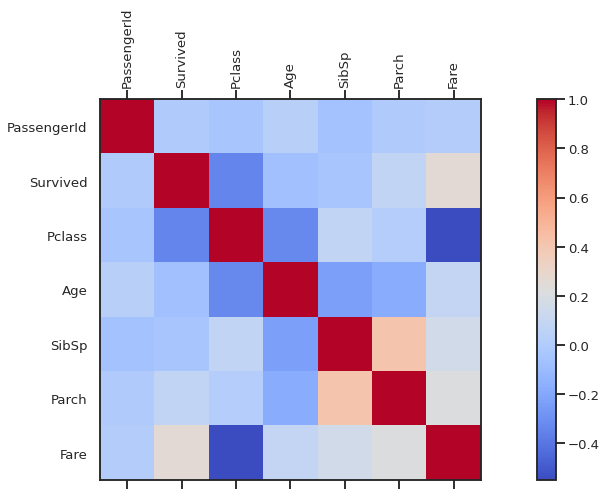

In [ ]:
corr= train.corr()
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(corr, cmap='coolwarm')
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.xticks(rotation=90)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
#drop passengerid
train.drop(['PassengerId'],axis = 1,inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
P_Class_dummies = pd.get_dummies(train['Pclass'])
P_Class_dummies.columns = ['PClass1','PClass2','PClass3']
train = pd.concat([train.drop('Pclass',axis = 1),P_Class_dummies],axis = 1)
train.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PClass1,PClass2,PClass3
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0
4,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1


In [ ]:
S_dummies = pd.get_dummies(train['Sex'])
S_dummies.columns = ['male','female']
train = pd.concat([train.drop('Sex',axis = 1),S_dummies],axis = 1)
train.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,PClass1,PClass2,PClass3,male,female
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0,0,1,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0,0,1,0
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,0,1,0,1


In [ ]:
# Create column family survived & died from column 'Name' (LastName)
train['LastName'] = train['Name'].str.split(',', expand=True)[0]
train[train['SibSp'] == 4]
train['Train'] = 1
alldata = train
sur_data = []
died_data = []
for index, row in alldata.iterrows():
    s = alldata[(alldata['LastName']==row['LastName']) & (alldata['Survived']==1)]
    d = alldata[(alldata['LastName']==row['LastName']) & (alldata['Survived']==0)]
    
    s=len(s)
    if row['Survived'] == 1:
        s-=1

    d=len(d)
    if row['Survived'] == 0:
        d-=1
        
    sur_data.append(s)
    died_data.append(d)
    
alldata['FamilySurvived'] = sur_data
alldata['FamilyDied'] = died_data
alldata.dtypes
X = alldata[['Age', 'SibSp', 'Parch', 'Fare','PClass1', 'PClass2', 'PClass3', 'male', 'female','FamilySurvived', 'FamilyDied']]
X.head()
Y = alldata[['Survived']]
clean_data = pd.concat([X,Y],axis = 1)
clean_data.head()


,Age,SibSp,Parch,Fare,PClass1,PClass2,PClass3,male,female,FamilySurvived,FamilyDied,Survived
0,22.0,1,0,7.2500,0,0,1,0,1,0,1,0
1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,1,1
4,35.0,0,0,8.0500,0,0,1,0,1,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train[['Age', 'SibSp', 'Parch', 'Fare']])
train[['Age', 'SibSp', 'Parch', 'Fare']] = sc.transform(train[['Age', 'SibSp', 'Parch', 'Fare']])

In [ ]:
#drop passengerid
train.drop(['Ticket'],axis = 1,inplace=True)
train.head()

,Survived,Name,Age,SibSp,Parch,Fare,Embarked,PClass1,PClass2,PClass3,male,female,LastName,Train,FamilySurvived,FamilyDied
0,0,"Braund, Mr. Owen Harris",-0.592481,0.432793,-0.473674,-0.502445,S,0,0,1,0,1,Braund,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.638789,0.432793,-0.473674,0.786845,C,1,0,0,1,0,Cumings,1,0,0
2,1,"Heikkinen, Miss. Laina",-0.284663,-0.474545,-0.473674,-0.488854,S,0,0,1,1,0,Heikkinen,1,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.407926,0.432793,-0.473674,0.420730,S,1,0,0,1,0,Futrelle,1,0,1
4,0,"Allen, Mr. William Henry",0.407926,-0.474545,-0.473674,-0.486337,S,0,0,1,0,1,Allen,1,1,0


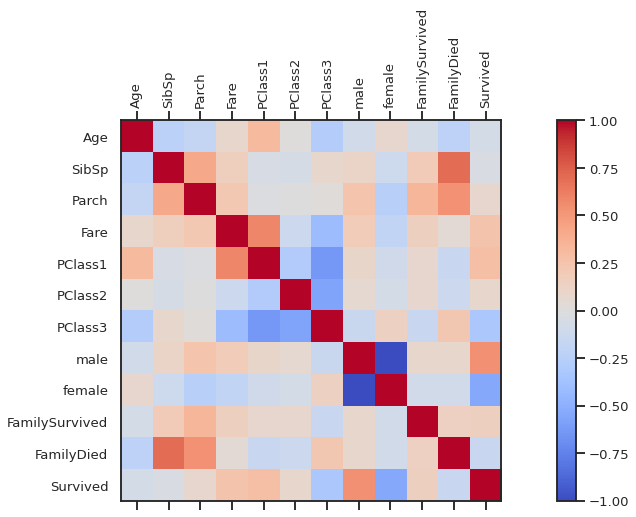

In [ ]:
corr= clean_data.corr()
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(corr, cmap='coolwarm')
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.xticks(rotation=90)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [ ]:
X = alldata[['Age', 'SibSp', 'Parch', 'Fare','PClass1', 'PClass2', 'PClass3', 'female','FamilySurvived', 'FamilyDied']]
X.head()
Y = alldata[['Survived']]
seed = 7
test_size = 0.4
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size= 0.5, random_state=seed)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

#use ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySurvived','FamilyDied'


(534, 10)
(178, 10)
(179, 10)
(534, 1)
(178, 1)
(179, 1)


In [ ]:
# define models
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
logistic = linear_model.LogisticRegression(solver='liblinear')
sgd = linear_model.SGDClassifier()
models = [logistic, sgd,dtree]
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='roc_auc')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
# loop through list of models
for model in models:
    print(model)
    get_cv_scores(model)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
CV Mean:  0.8798665045811666
STD:  0.02608304068957099


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
CV Mean:  0.8425930303234959
STD:  0.020263757618409522


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None

In [ ]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score:  0.7247751719273496
Best Params:  {'C': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.6s finished


In [ ]:
logistic = linear_model.LogisticRegression(C=0.0001, class_weight={1:0.5, 0:0.5}, penalty='l2', solver='liblinear')
get_cv_scores(logistic)

CV Mean:  0.8485440444834651
STD:  0.02713132783085252




In [ ]:
loss = ['hinge', 'log']
penalty = ['l1', 'l2']
alpha = [0.0001, 0.001]
learning_rate = ['constant', 'optimal']
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}]
eta0 = [1, 10]

param_distributions = dict(loss=loss,
                           penalty=penalty,
                           alpha=alpha,
                           learning_rate=learning_rate,
                           class_weight=class_weight,
                           eta0=eta0)

random = RandomizedSearchCV(estimator=sgd, param_distributions=param_distributions, scoring='accuracy', verbose=1, n_jobs=-1, n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score:  0.8407688238405925
Best Params:  {'penalty': 'l1', 'loss': 'log', 'learning_rate': 'optimal', 'eta0': 1, 'class_weight': {1: 0.5, 0: 0.5}, 'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    1.3s finished


In [ ]:
sgd = linear_model.SGDClassifier(alpha=0.001,
                                 class_weight={1:0.4, 0:0.6},
                                 eta0=1,
                                 learning_rate='optimal',
                                 loss='hinge',
                                 penalty='l1')
get_cv_scores(sgd)

CV Mean:  0.8560196753787623
STD:  0.03962012473250476




In [ ]:
from sklearn.metrics import accuracy_score
sgd.fit(x_train, y_train)

y_train_pred = sgd.predict(x_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy: %.2f%%" % (accuracy_train*100))


y_test_pred = sgd.predict(x_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy: %.2f%%" % (accuracy_test*100))

Accuracy: 83.33%
Accuracy: 75.42%


Neural Network

In [ ]:
from keras import models
from keras import layers
nn=models.Sequential()
nn.add(layers.Dense(1024,activation = "relu",input_shape=(10,))) 
nn.add(layers.Dense(512,activation='relu'))
nn.add(layers.Dense(256,activation='relu'))
nn.add(layers.Dense(128,activation='relu'))
nn.add(layers.Dense(1,activation='sigmoid'))
nn.summary()
nn.compile(optimizer="rmsprop",loss='binary_crossentropy',metrics = ['accuracy'])
nn.fit(X,Y, epochs=1000, validation_split=0.16)
test_loss,test_acc=nn.evaluate(x_test,y_test)
print(test_acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              11264     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 700,417
Trainable params: 700,417
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.5380 - accuracy: 0.7406 - val_loss: 0.40

In [ ]:
print('Train accuracy =         94.39% ')
print('Validation accuracy =    82.52% ')
print('Test accuracy =          90.50% ')

Train accuracy =         94.39% 
Validation accuracy =    82.52% 
Test accuracy =          90.50% 


# **Q2) Classification model**

Decision Tree

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

Y_pred = decision_tree.predict(x_test)

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

99.25 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_split=4, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_decrease=0.0,presort='deprecated',ccp_alpha=0.0)
decision_tree.fit(x_train, y_train)

Y_pred = decision_tree.predict(x_test)

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

96.25 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_split=6, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_decrease=0.0,presort='deprecated',ccp_alpha=0.0)
decision_tree.fit(x_val, y_val)

Y_pred = decision_tree.predict(x_val)

acc_decision_tree = round(decision_tree.score(x_val, y_val) * 100, 2)
print(round(acc_decision_tree,2,), "%")

93.26 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_split=7, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_decrease=0.0,presort='deprecated',ccp_alpha=0.0)
decision_tree.fit(x_test, y_test)

Y_pred = decision_tree.predict(x_test)

acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
print(round(acc_decision_tree,2,), "%")

91.62 %


# **Q3)**

Hyperparameter:

criterion='gini',

splitter='best', 

max_depth=None, 

min_samples_split={1,6,7},

min_samples_leaf=1, 

min_weight_fraction_leaf=0.0, 

min_impurity_decrease=0.0, 

presort='deprecated', 

ccp_alpha=0.0





In [ ]:
print('Train accuracy =         96.25% ')
print('Validation accuracy =    93.26% ')
print('Test accuracy =          91.62% ')